Heath Thomspon
Computer Science
CS 477 - Spring 2021
Final Project - Predicting Survivors on the Titanic Using Logistic Regression

## Import necessary modules

In [7]:
import pandas
import matplotlib.pyplot as matplot
import numpy

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, plot_roc_curve, plot_precision_recall_curve, accuracy_score


## Preprocessing

train.shape = (891, 12)
test.shape = (418, 11)

Remove Unnecessary Data
Looking at the data using train.head(), I saw several features that should have zero weight on whether or not a passenger died. These features include PassengerId, Name, Ticket, Cabin. I removed these from the datasets.

Convert Qualitative to Quantitative
I need to also convert any data that is qualatative into quantitative data. I do so using pandas.get_dummies() which turns all qualatative data into binary data types. If the column has more than two types of input. ex.dog,cat,bird, it will create a colums for each. If yes, then 1 else 0.

Fill Missing Values
Lastly, I need to make sure my train and test data contain no null/NA values as I don't know how these will affect the logistic regression model. Using isnull(), I found that hundreds of cells of missing data under the age column. Although it would be easier to just delete this column, it's necessary to keep it because age has an important role in whether or not someone lives. I could also remove the samples from the data that have null age values, but because there are so many that are null (train: 177 test:86), roughly 25% or all samples, that may not be the best option. This leaves me with the decision to replace null cells with a value. I chose to use the mean of the column to fill these null cells. I have read about bfill and ffill and may later on choose those if I believe they will make the model more accurate.



In [8]:
#paths to test and train data sets provided by https://www.kaggle.com/c/titanic/data
trainloc = "C:\\Users\\Heath\\OneDrive\\Documents\\CS\\CS477\\FinalProject-TitanicSurvivors\\train.csv"
testloc = "C:\\Users\\Heath\\OneDrive\\Documents\\CS\\CS477\\FinalProject-TitanicSurvivors\\test.csv"


#load datasets inot test and train variables
trainraw = pandas.read_csv(trainloc)
train = trainraw.copy()
#testraw = pandas.read_csv(testloc)
#test = testraw.copy()
#train.head()    #used to get a quick look at data
    
#print("Train: ", train.shape)
#print("Test: ", test.shape)

#remove unnecessary data from training set
train.drop('PassengerId', axis=1, inplace=True)
train.drop('Name', axis=1, inplace=True)
train.drop('Ticket', axis=1, inplace=True)
train.drop('Cabin', axis=1, inplace=True)
#remove unnecessary data from test set, not used in proect, do not have target data for test
#test.drop('PassengerId', axis=1, inplace=True)
#test.drop('Name', axis=1, inplace=True)
#test.drop('Ticket', axis=1, inplace=True)
#test.drop('Cabin', axis=1, inplace=True)

#covert Pclass, Sex, and Embarked columns from categorical data to binary data using one hot encoding
train = pandas.get_dummies(train, columns=['Pclass', 'Sex', 'Embarked'])
#test = pandas.get_dummies(test, columns=['Pclass', 'Sex', 'Embarked'])

#check for missing values in datasets
#train.isnull().sum()            #177 null age values
#test.isnull().sum()             #86 null age values

#fill null cells with the mean age in both train and test sets
train['Age'].fillna(train['Age'].median(skipna=True), inplace=True)
#test['Age'].fillna(test['Age'].median(skipna=True), inplace=True)

#after preprocessing
print("Train: ", train.shape)
#print("Test: ", test.shape)
print(train.head())


Train:  (891, 13)
   Survived   Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  \
0         0  22.0      1      0   7.2500         0         0         1   
1         1  38.0      1      0  71.2833         1         0         0   
2         1  26.0      0      0   7.9250         0         0         1   
3         1  35.0      1      0  53.1000         1         0         0   
4         0  35.0      0      0   8.0500         0         0         1   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0           0         1           0           0           1  
1           1         0           1           0           0  
2           1         0           0           0           1  
3           1         0           0           0           1  
4           0         1           0           0           1  


## Training Model
Here we train a logistic regression model before any we apply any optimization techniques.
After training the model, I need to make sure to scale the features to prevent any features from being given too much weight in the model. I will do this using standardization.


In [9]:
X = train.drop('Survived', axis=1)
y = train['Survived']

#split data into training anf validation sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.20, random_state = 0)
print(f"Train: {X_train.shape} \nTest: {X_test.shape}")
print(f"Train: {y_train.shape} \nTest: {y_test.shape}")

#standardizing features in our training, validation, and test sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#print(X_train)
X_test = scaler.transform(X_test)
#test = scaler.transform(test) used for kaggle competition, but not project as I do not have target data for this test set

#training to logistic regression model
model1 = LogisticRegression(random_state=0)
model1.fit(X_train, y_train)




Train: (712, 12) 
Test: (179, 12)
Train: (712,) 
Test: (179,)


LogisticRegression(random_state=0)

## Evaluating the model before tuning hyperparameters
This is where we test the model to study performance/accuracy before we optimize it

In [10]:
print("Training Accuracy: ", model1.score(X_train, y_train))
print("Testing Accuracy: ", model1.score(X_test, y_test))

Training Accuracy:  0.8019662921348315
Testing Accuracy:  0.8044692737430168


## Tuning the model using GridSearchCV

In [11]:
model2 = LogisticRegression(random_state=0, solver='liblinear')
params = {  
            'penalty' : ['l1', 'l2'],
            'C' : [0.01, 0.1, 1, 10, 100, 1000] }

model2 = GridSearchCV(estimator=model2, cv=15, param_grid=params, scoring='accuracy')

model2.fit(X_train, y_train)
print("best parameters: ", model2.best_params_)
print("best score: ", model2.best_score_)


best parameters:  {'C': 0.1, 'penalty': 'l2'}
best score:  0.8007092198581559


## Evaluation of Final Model

Display various metrics used to measure performance of generated model

                Predicted Dead  Predicted Alive
Actually Dead               93               17
Actually Alive              18               51

Accuracy: 0.804
Recall: 0.739
Precision: 0.750
Auc: 0.868


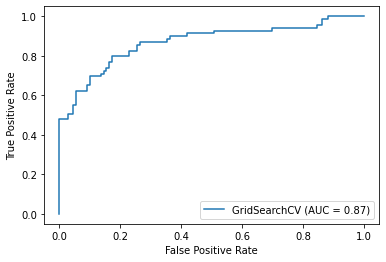

<function matplotlib.pyplot.show(close=None, block=None)>

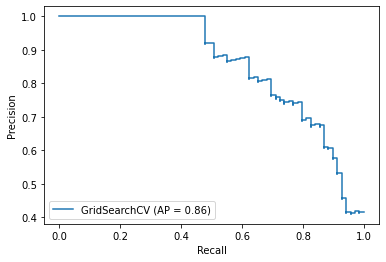

In [14]:
y_test_pred = model2.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

#convert confusion matrix into readable table
results = pandas.DataFrame(cm)
results.columns = ['Predicted Dead', 'Predicted Alive']
results.index = ['Actually Dead', 'Actually Alive']

#print off metrics
print(results)
print()
print("Accuracy: %0.3f" %((cm[0][0]+cm[1][1])/y_test.shape[0]))
print("Recall: %0.3f" %(cm[1][1]/(cm[1][0]+cm[1][1])))
print("Precision: %0.3f" %(cm[1][1]/(cm[1][1]+cm[0][1])))

#find value of auc
y_score = model2.decision_function(X_test)
fpr, tpr, thresh = roc_curve(y_test, y_score)
roc_auc = auc(fpr,tpr)
print("Auc: %0.3f" %roc_auc)

#plot precision recall curve, and roc curve
plot_roc_curve(model2, X_test, y_test)
matplot.show()
plot_precision_recall_curve(model2, X_test, y_test)
matplot.show
